<a href="https://colab.research.google.com/github/JulianMejia6/IA_2025/blob/main/ArbolTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape Titanic: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

/tmp/ipython-input-4234671727.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
/tmp/ipython-input-4234671727.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

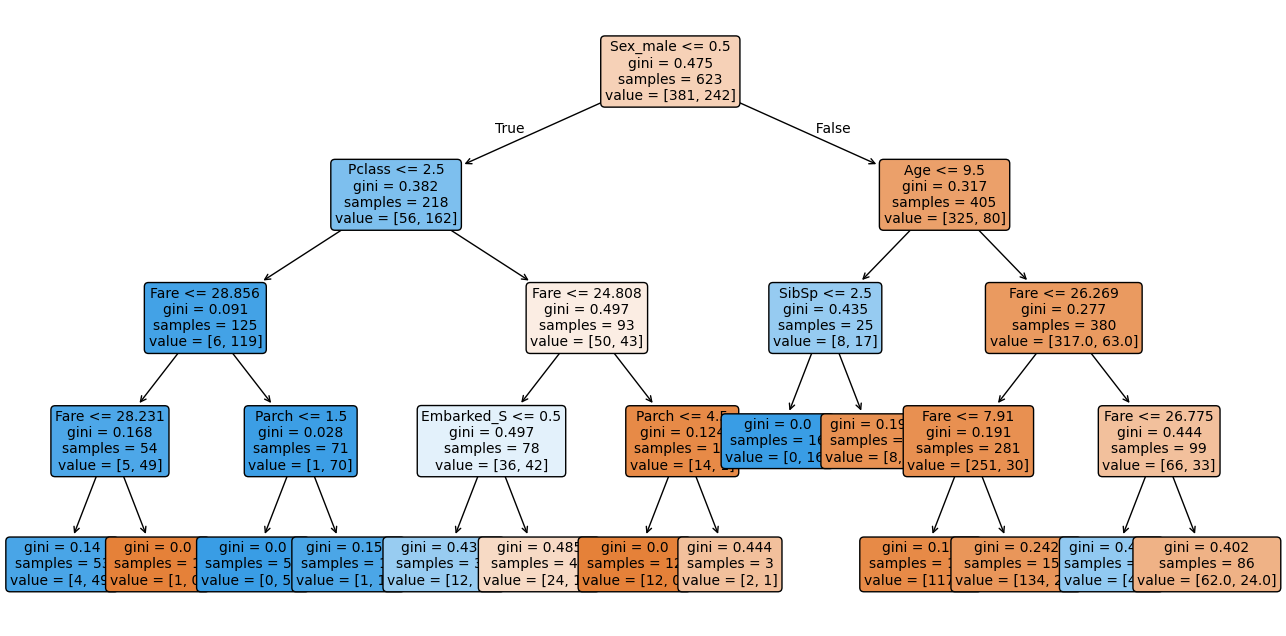


Shape Housing: (1000, 2)
   House_Size       Price
0  143.635030  417.428104
1  287.678577  601.054220
2  232.998485  588.407166
3  199.664621  539.925605
4   89.004660  338.197911
Columns after select_dtypes: Index(['House_Size', 'Price'], dtype='object')

===== MODELO HOUSING =====
RMSE: 52.56
R2: 0.851

Importancia de predictores (Housing):
    Predictor  Importancia
0  House_Size          1.0


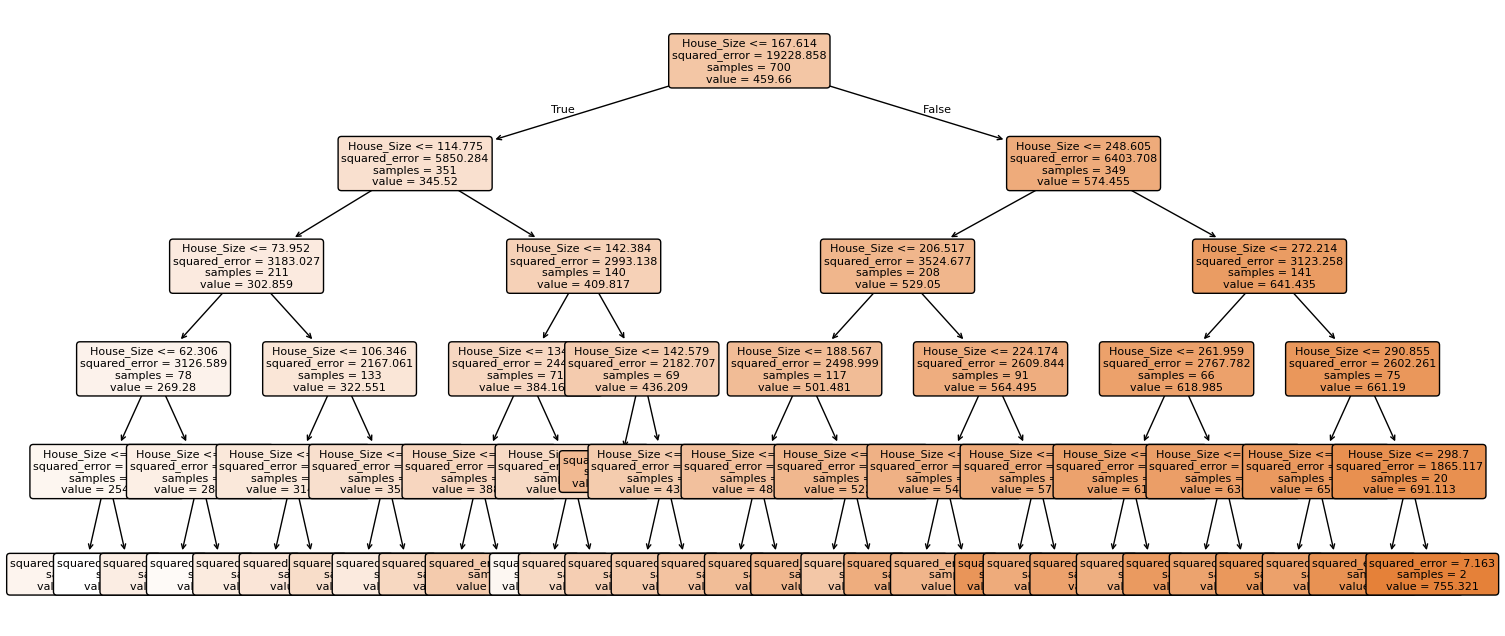


===== PRUEBA DE PARÁMETROS =====
Titanic - max_depth=3 -> Accuracy=0.828
Titanic - max_depth=5 -> Accuracy=0.813
Titanic - max_depth=7 -> Accuracy=0.799
Titanic - max_depth=10 -> Accuracy=0.795
Housing - max_depth=3 -> RMSE=51.22
Housing - max_depth=5 -> RMSE=52.56
Housing - max_depth=7 -> RMSE=58.58
Housing - max_depth=10 -> RMSE=67.66


In [3]:
# -*- coding: utf-8 -*-
"""
Árboles de decisión aplicados a los datasets Titanic y Housing
Basado en el notebook original "arbol de decisiones.ipynb"
"""

# ========================
# 1. LIBRERÍAS
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

# ========================
# 2. DATASET: TITANIC
# ========================

titanic = pd.read_csv("/content/titanic-train.csv")
print("Shape Titanic:", titanic.shape)
print(titanic.head())

# Seleccionamos variables relevantes
titanic = titanic[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

# Limpieza básica
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

# Convertimos variables categóricas
titanic = pd.get_dummies(titanic, columns=["Sex", "Embarked"], drop_first=True)

# Variables predictoras y objetivo
X_titanic = titanic.drop(columns=["Survived"])
y_titanic = titanic["Survived"]

# División entrenamiento y prueba
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_titanic, y_titanic, test_size=0.3, random_state=2022)

# ========================
# 3. MODELO TITANIC - CLASIFICACIÓN
# ========================
print("\n===== MODELO TITANIC =====")

clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    min_samples_split=10,
    random_state=2022
)
clf.fit(X_train_t, y_train_t)

# Predicciones
y_pred_t = clf.predict(X_test_t)

# Métricas
acc = accuracy_score(y_test_t, y_pred_t)
print("Accuracy:", acc)
print("Matriz de confusión:\n", confusion_matrix(y_test_t, y_pred_t))
print(classification_report(y_test_t, y_pred_t))

# Importancia de predictores
importancia_titanic = pd.DataFrame({
    "Predictor": X_titanic.columns,
    "Importancia": clf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("\nImportancia de predictores (Titanic):")
print(importancia_titanic)

# Gini promedio (impureza total media del modelo)
gini_importancia = 1 - np.mean((y_test_t - y_pred_t)**2)
print("\nÍndice Gini aproximado:", round(gini_importancia, 4))

# Visualización del árbol
fig, ax = plt.subplots(figsize=(16,8))
plot_tree(clf, feature_names=X_titanic.columns, filled=True, rounded=True, fontsize=10)
plt.show()

# ========================
# 4. DATASET: HOUSING
# ========================

housing = pd.read_csv("/content/house_prices_large.csv")
print("\nShape Housing:", housing.shape)
print(housing.head())

# Selección de variables numéricas
housing = housing.select_dtypes(include=np.number)

print("Columns after select_dtypes:", housing.columns)

housing.dropna(inplace=True)

# Variable dependiente
y_housing = housing["Price"]
X_housing = housing.drop(columns=["Price"])

# División entrenamiento/prueba
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_housing, y_housing, test_size=0.3, random_state=2022)

# ========================
# 5. MODELO HOUSING - REGRESIÓN
# ========================
print("\n===== MODELO HOUSING =====")

reg = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=20,
    random_state=2022
)
reg.fit(X_train_h, y_train_h)

# Predicciones
y_pred_h = reg.predict(X_test_h)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test_h, y_pred_h))
r2 = r2_score(y_test_h, y_pred_h)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.3f}")

# Importancia de predictores
importancia_housing = pd.DataFrame({
    "Predictor": X_housing.columns,
    "Importancia": reg.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("\nImportancia de predictores (Housing):")
print(importancia_housing.head(10))

# Visualización del árbol
fig, ax = plt.subplots(figsize=(18,8))
plot_tree(reg, feature_names=X_housing.columns, filled=True, rounded=True, fontsize=8)
plt.show()

# ========================
# 6. OPTIMIZACIÓN DE PARÁMETROS
# ========================
print("\n===== PRUEBA DE PARÁMETROS =====")

for depth in [3, 5, 7, 10]:
    clf_test = DecisionTreeClassifier(max_depth=depth, random_state=2022)
    clf_test.fit(X_train_t, y_train_t)
    y_pred_temp = clf_test.predict(X_test_t)
    acc_temp = accuracy_score(y_test_t, y_pred_temp)
    print(f"Titanic - max_depth={depth} -> Accuracy={acc_temp:.3f}")

for depth in [3, 5, 7, 10]:
    reg_test = DecisionTreeRegressor(max_depth=depth, random_state=2022)
    reg_test.fit(X_train_h, y_train_h)
    y_pred_temp = reg_test.predict(X_test_h)
    rmse_temp = np.sqrt(mean_squared_error(y_test_h, y_pred_temp))
    print(f"Housing - max_depth={depth} -> RMSE={rmse_temp:.2f}")